# <center><font color='cyan'>PUBG Prediction

<center><img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExOHhvbWlzbXlzZWUwOXdyeDQ0M3Jsbndlam1kcndnejVyZDc5ZXduaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Li0OOdFFgAfECfuE9H/giphy.gif" alt="Loading animation"></center>



### Table Contents

1. [Importing Libraries](#import)
2. [Reading the Data](#read)

# Importing Libraries<a class="anchor" id="import"></a>

In [2]:
#Stadard Libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#handling warnings
import warnings
warnings.filterwarnings('ignore')

#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import catboost as cb


## Reading the Data <a class='anchor' id='read'></a>

In [3]:
data = pd.read_csv("E:\PUBG_Game_Prediction_data.csv")
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
data.shape

(4446966, 29)


Data Descritption :-

DBNOs - Number of enemy players knocked.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

Id - Player’s Id

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

killStreaks - Max number of enemy players killed in a short amount of time.
kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration - Duration of match in seconds.
matchId - ID to identify match. There are no matches that are in both the training and testing set.

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.-

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## Data Wraggling

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [8]:
data[data['winPlacePerc'].isna()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
data = data.drop(2744604)
data['winPlacePerc'].isna().sum()

0

**Understanding Player Distribution**

In [10]:
data.groupby('matchId')['matchId'].transform('count').head()

0    96
1    91
2    98
3    91
4    97
Name: matchId, dtype: int64

In [11]:
#Creating a new parameter
data['playersJoined'] = data.groupby('matchId')['matchId'].transform('count')
#If a match has 60 different players than we will have 60 instances of 'matchId'. 
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


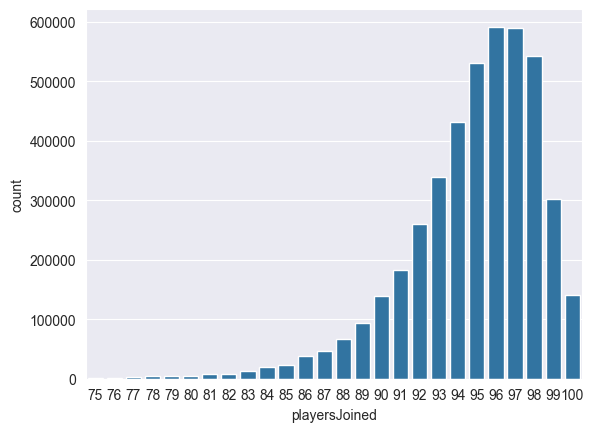

In [12]:
#PLotting the Graph
sns.countplot(x=data[data['playersJoined']>=75]['playersJoined'],data=data)
plt.show()

This shows that we have to normalize our data . As 20 kills in game of 30 is very substantial than , 20 kills in a game of 100

## Analysing the data

Kills without Moving?

-Now the thing is Kills without moving can be due to various reasons maybe you got a weapon as soon as you landed or bomb blast or you are plain hacker (●'◡'●)

In [13]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined'],
      dtype='object')

In [15]:
#prepare the data parameter to get the information of total distance travelled
data['totalDistance'] = data['rideDistance']+data['swimDistance']+data['walkDistance']
data['totalDistance'].head()

0     244.8000
1    1445.0445
2     161.8000
3     202.7000
4      49.7500
Name: totalDistance, dtype: float64

In [16]:
#prepare a data parameter to check for anomaly detection that the person has not moved still able to take kills
data['killsWithoutMoving'] = ((data['kills']>0) & (data['totalDistance']==0))
data[data['killsWithoutMoving']==True].shape

(1535, 32)

In [ ]:
data = data.drop(data[data['killsWithoutMoving']==True].index,axis=0)

Extra-Ordinary Road Kills 

In [17]:
data[data['roadKills']>5].shape

(46, 32)

Very High number of Kills -> Pro player or Hacker -> both are not relevant to us as we want a model which generalises as much as possible

Text(0.5, 1.0, 'Distribution of Kills by Players')

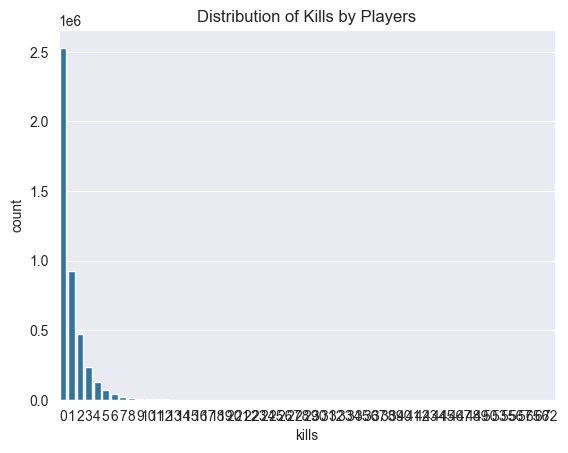

In [18]:
sns.countplot(data=data,x='kills').set_title('Distribution of Kills by Players')

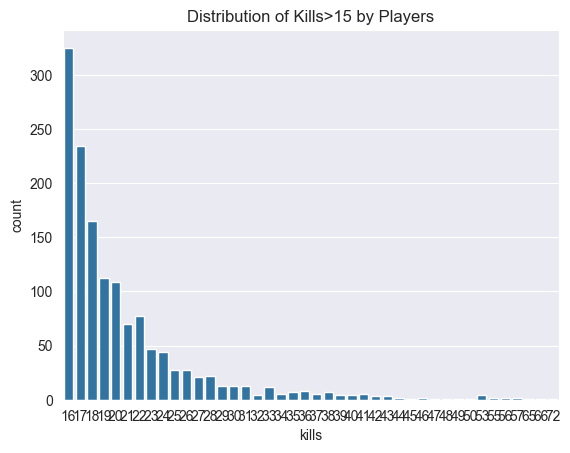

In [19]:
sns.countplot(data=data[data['kills']>15],x='kills').set_title('Distribution of Kills>15 by Players')
plt.show()

To remove the outliers , I will drop all the data where kills > 20

In [20]:
data[data['kills']>20].shape

(463, 32)

In [21]:
data = data.drop(data[data['kills']>20].index,axis=0)

In [22]:
data['headShotRate'] = data['headshotKills']/data['kills']
data['headShotRate'] = data['headShotRate'].fillna(0)

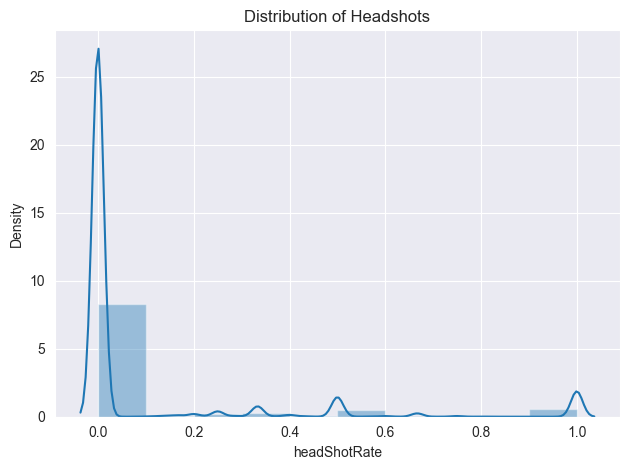

In [23]:
sns.distplot(data['headShotRate'],bins=10).set_title('Distribution of Headshots')
plt.tight_layout()
plt.show()

Head shot Rate = 1 is okay if the number of kills are less but if it is 1 with many kills (ex:- 5+) then it is an anomaly 

In [24]:
data[(data['headShotRate']==1) & (data['kills']>5)].shape

(188, 33)

In [25]:
data = data.drop(data[(data['headShotRate']==1) & (data['kills']>5)].index,axis=0)

Longest Shot

In [26]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killsWithoutMoving', 'headShotRate'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of LongestKill')

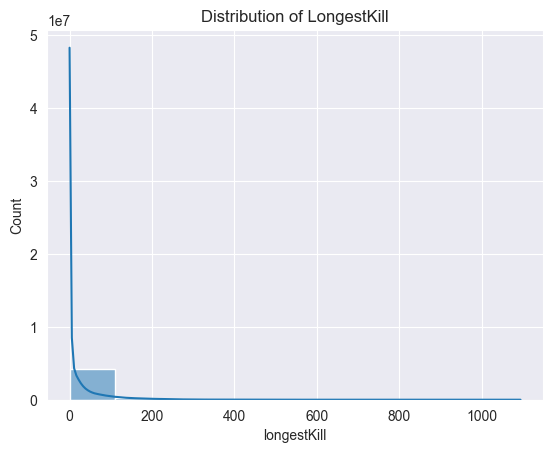

In [28]:
sns.histplot(data['longestKill'],bins=10,kde=True,legend=False).set_title('Distribution of LongestKill')

In [27]:
data[data['longestKill']>500].shape

(1743, 33)

In [29]:
data = data.drop(data[data['longestKill']>500].index,axis=0)

Text(0.5, 1.0, 'Distribution of Weapons Change')

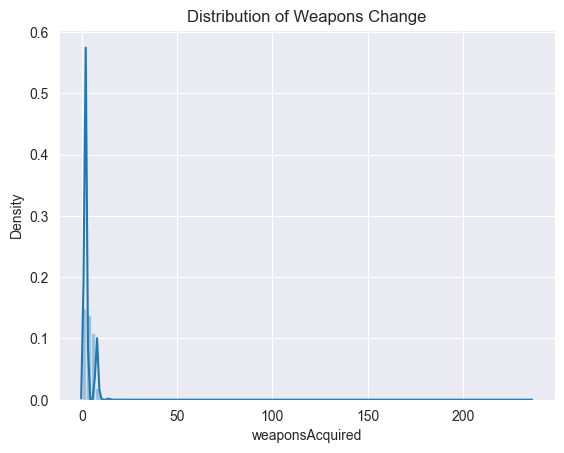

In [30]:
sns.distplot(data['weaponsAcquired'],bins=100).set_title('Distribution of Weapons Change')

In [32]:
data[data['weaponsAcquired']>=15].shape

(7415, 33)

In [34]:
data = data.drop(data[data['weaponsAcquired']>=15].index,axis=0)

## EDA

In [35]:
data.shape

(4437156, 33)

In [38]:
data.columns[data.isna().sum()>0]

Index([], dtype='object')

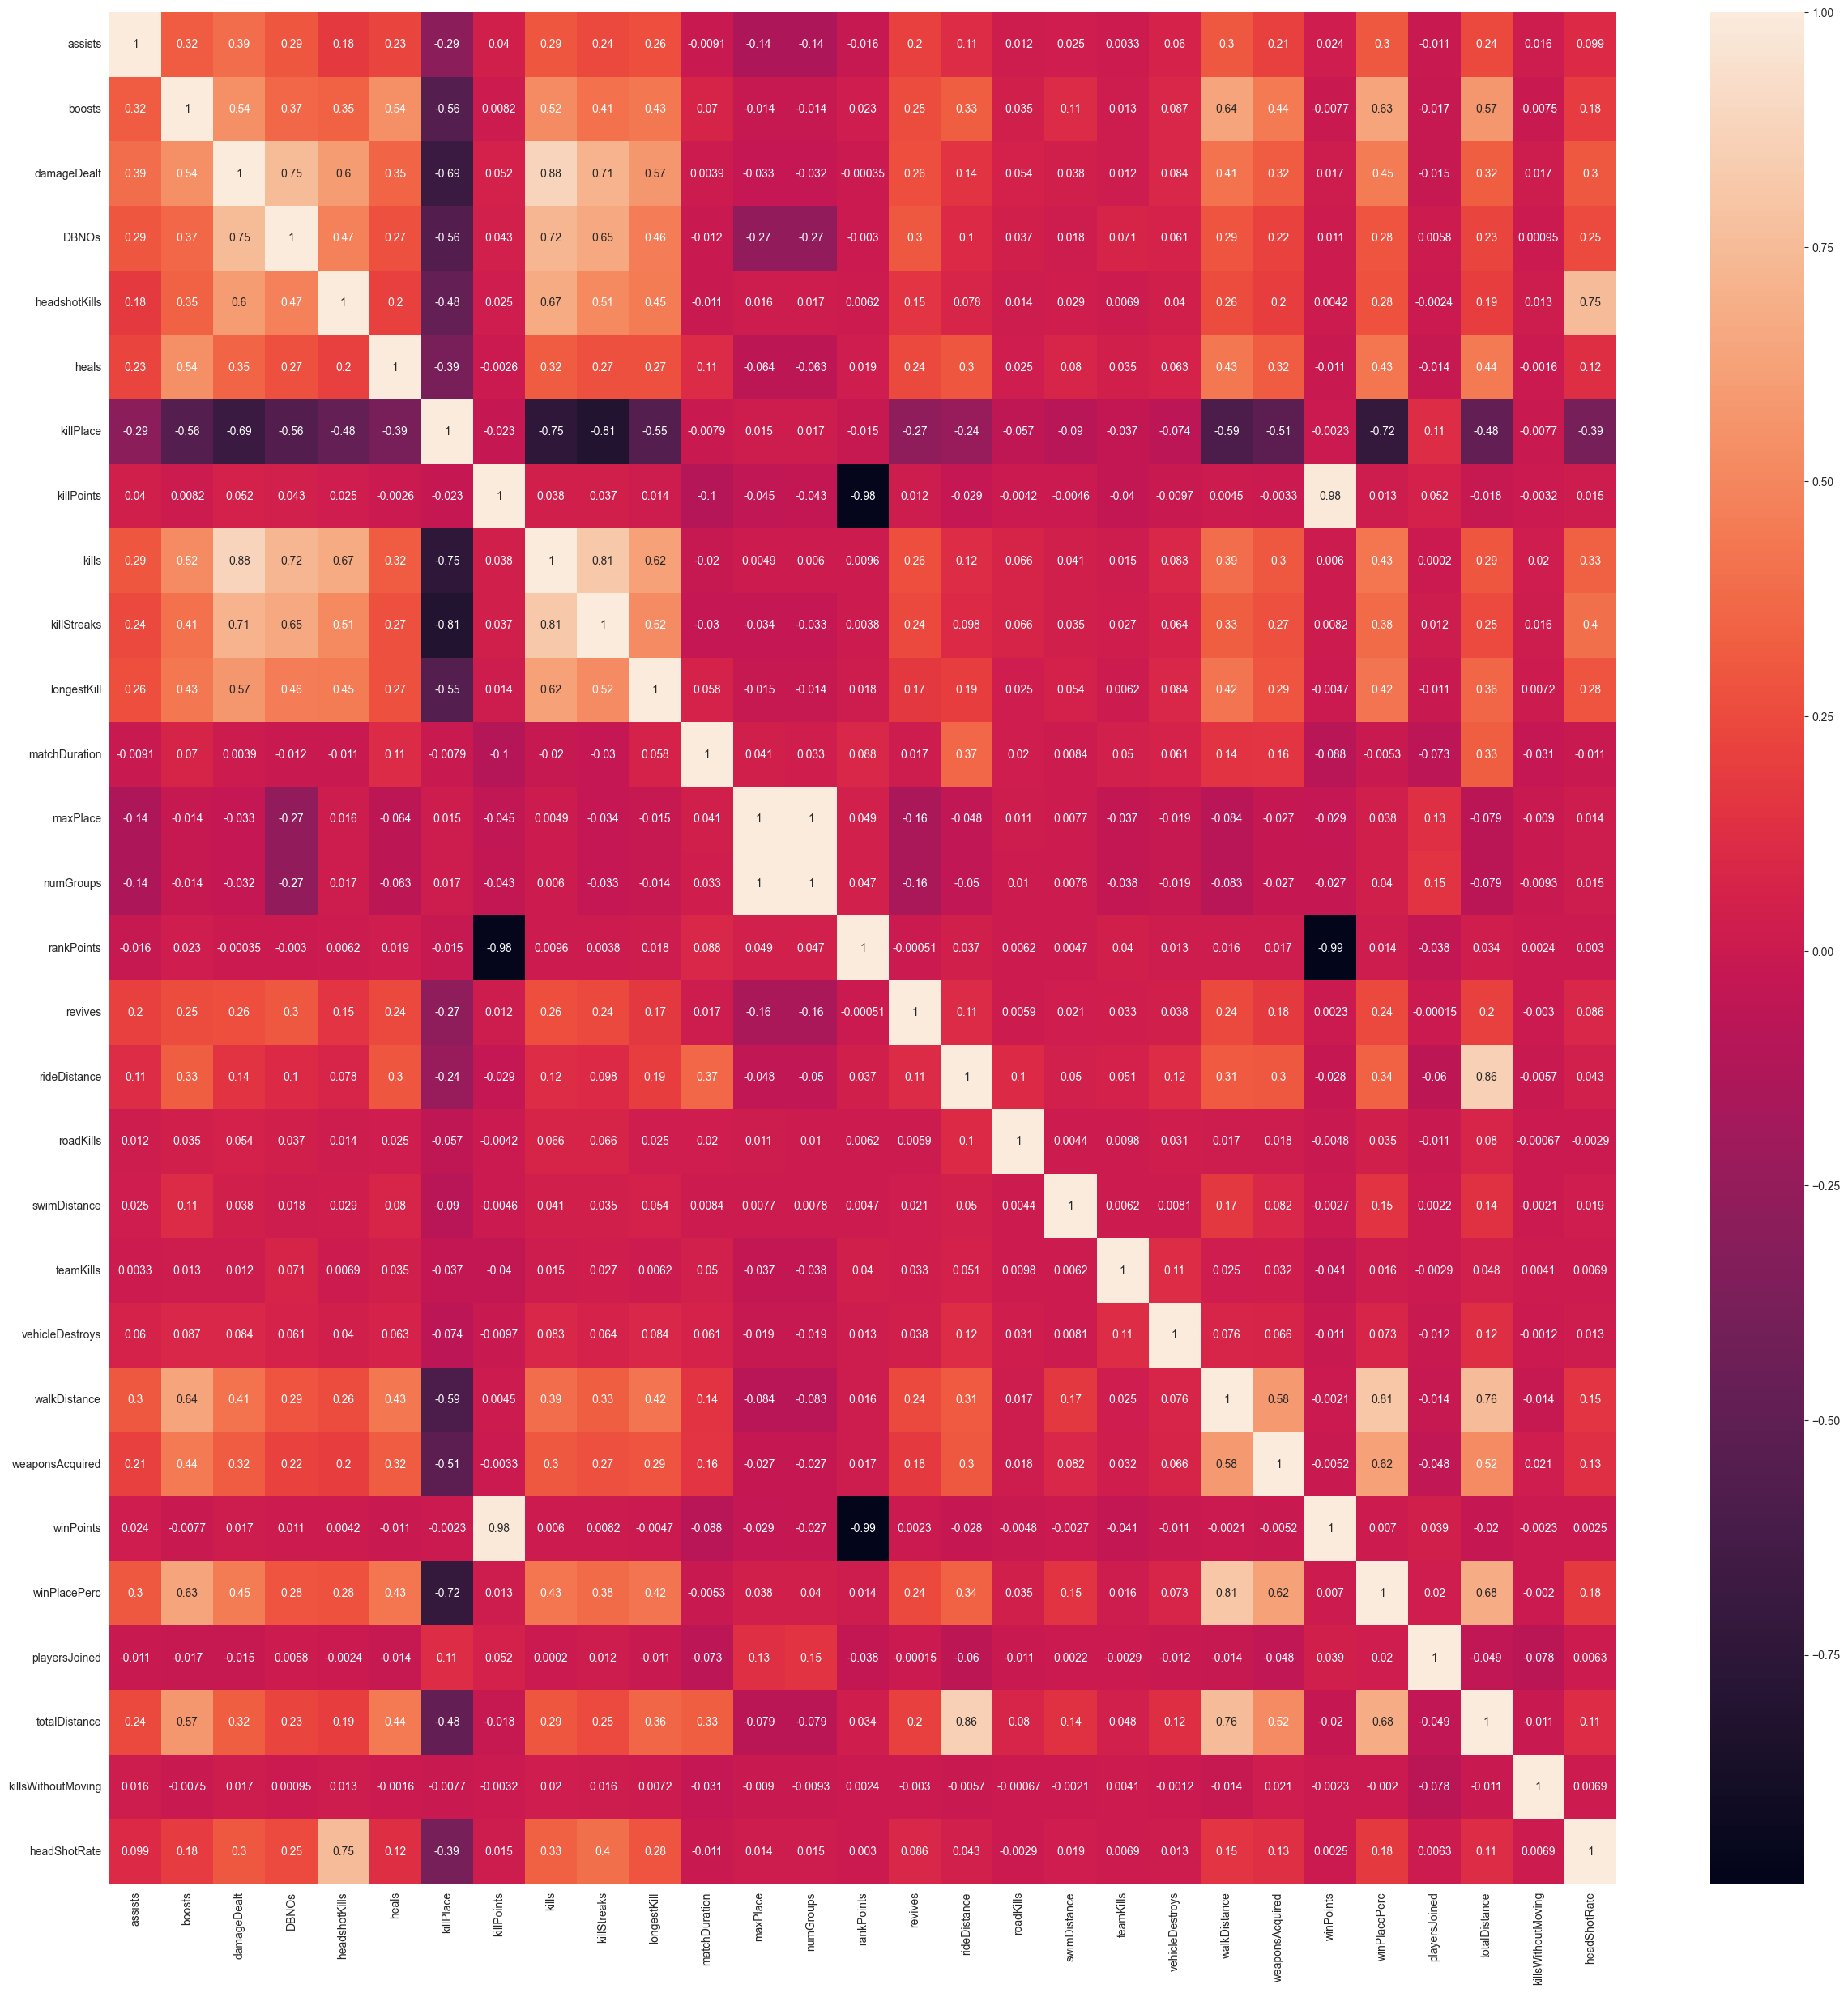

In [40]:
plt.figure(figsize=[30,30])
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

## Feature Engineering

We are giving more importance to a game with lesser number of people than games with more number , Why?

<Axes: xlabel='playersJoined', ylabel='Count'>

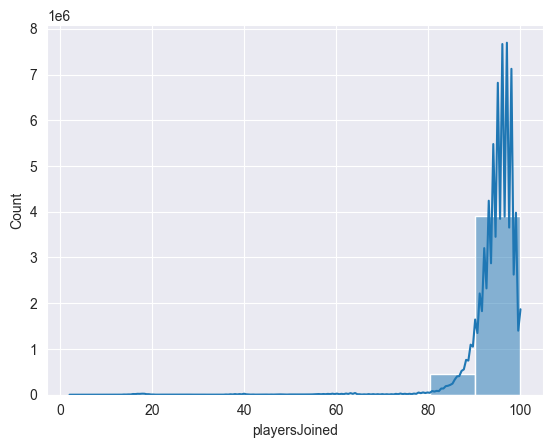

In [45]:
sns.histplot(data['playersJoined'],bins=10,kde=True)
#Ans -> To normalize the one closer to 100 with the ones away from them

In [47]:
norm_factor = (100-data['playersJoined'])/100 + 1
norm_factor

0          1.04
1          1.09
2          1.02
3          1.09
4          1.03
           ... 
4446961    1.06
4446962    1.07
4446963    1.02
4446964    1.06
4446965    1.02
Name: playersJoined, Length: 4437156, dtype: float64

In [48]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killsWithoutMoving', 'headShotRate'],
      dtype='object')

In [50]:
to_drop = ['rideDistance','swimDistance','walkDistance','totalDistance','heals','boosts','assist','revives','kills','damageDealt','maxPlace','matchDuration','Id','groupId','matchId']

data['travelDistance'] = data['rideDistance']+data['swimDistance']+data['walkDistance']
data['healsBoost'] = data['heals']+data['boosts']
data['assist'] = data['assists'] + data['revives']

#normalize
data['killsNorm'] = data['kills'] * norm_factor
data['damageDealtNorm'] = data['damageDealt'] * norm_factor
data['maxPlaceNorm'] = data['maxPlace'] * norm_factor
data['matchDurationNorm'] = data['matchDuration'] * norm_factor

data = data.drop(to_drop,axis=1)

data.shape

(4437156, 25)

# ML - CatBoost Model

Handling Categorical Data

In [63]:
x = data.drop('winPlacePerc',axis=1)
y = data['winPlacePerc']

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4437156 entries, 0 to 4446965
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   assists             int64  
 1   DBNOs               int64  
 2   headshotKills       int64  
 3   killPlace           int64  
 4   killPoints          int64  
 5   killStreaks         int64  
 6   longestKill         float64
 7   matchType           object 
 8   numGroups           int64  
 9   rankPoints          int64  
 10  roadKills           int64  
 11  teamKills           int64  
 12  vehicleDestroys     int64  
 13  weaponsAcquired     int64  
 14  winPoints           int64  
 15  playersJoined       int64  
 16  killsWithoutMoving  bool   
 17  headShotRate        float64
 18  travelDistance      float64
 19  healsBoost          int64  
 20  killsNorm           float64
 21  damageDealtNorm     float64
 22  maxPlaceNorm        float64
 23  matchDurationNorm   float64
dtypes: bool(1), float64(7), int64

In [56]:
x.shape

(4437156, 24)

In [66]:
x = pd.get_dummies(x,columns=['matchType','killsWithoutMoving'])
x.shape

(4437156, 40)

In [67]:
features = x.columns
features

Index(['assists', 'DBNOs', 'headshotKills', 'killPlace', 'killPoints',
       'killStreaks', 'longestKill', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playersJoined', 'headShotRate', 'travelDistance', 'healsBoost',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killsWithoutMoving_False',
       'killsWithoutMoving_True'],
      dtype='object')

In [58]:
x.head()

,assists,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False,killsWithoutMoving_True
0,0,0,0,60,1241,0,0.00,26,-1,0,...,False,False,False,False,False,False,False,True,True,False
1,0,0,0,57,0,0,0.00,25,1484,0,...,False,False,False,False,False,False,False,True,True,False
2,1,0,0,47,0,0,0.00,47,1491,0,...,False,False,False,False,False,False,False,False,True,False
3,0,0,0,75,0,0,0.00,30,1408,0,...,False,False,False,False,False,False,False,True,True,False
4,0,0,0,45,0,1,58.53,95,1560,0,...,False,False,False,False,False,True,False,False,True,False


## Scaling the Data

In [68]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
#type of result from fit_transform is numpy array by default
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.401049,-0.582847,-0.384198,0.449465,1.172557,-0.765045,-0.459689,-0.732653,-1.212426,-0.047595,...,-0.005536,-0.014243,-0.008715,-0.055442,-0.206512,-0.370811,-0.405021,1.236376,0.014044,-0.014044
1,-0.401049,-0.582847,-0.384198,0.340170,-0.804703,-0.765045,-0.459689,-0.775620,0.803537,-0.047595,...,-0.005536,-0.014243,-0.008715,-0.055442,-0.206512,-0.370811,-0.405021,1.236376,0.014044,-0.014044
2,1.341353,-0.582847,-0.384198,-0.024146,-0.804703,-0.765045,-0.459689,0.169663,0.813040,-0.047595,...,-0.005536,-0.014243,-0.008715,-0.055442,-0.206512,-0.370811,-0.405021,-0.808815,0.014044,-0.014044
3,-0.401049,-0.582847,-0.384198,0.995939,-0.804703,-0.765045,-0.459689,-0.560783,0.700363,-0.047595,...,-0.005536,-0.014243,-0.008715,-0.055442,-0.206512,-0.370811,-0.405021,1.236376,0.014044,-0.014044
4,-0.401049,-0.582847,-0.384198,-0.097010,-0.804703,0.647114,0.727335,2.232099,0.906711,-0.047595,...,-0.005536,-0.014243,-0.008715,-0.055442,-0.206512,2.696795,-0.405021,-0.808815,0.014044,-0.014044


## Splitting Data

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(3106009, 40) (3106009,)
(1331147, 40) (1331147,)


Cat Boost -> Gradient Boosting + Decision Tree 

Takes part of trees and boost them up using gradient decent 

In [70]:
#Exporting train and test dataset to run on some good sites as I don't think my laptop will be able to perform these operation

xtrain.to_csv('xtrain.csv',index=False)
xtest.to_csv('xtest.csv',index=False)
ytrain.to_csv('ytrain.csv',index=False)
ytest.to_csv('ytest.csv',index=False)

## Cat Boost Model

In [71]:
import catboost as cb

trainDataset = cb.Pool(xtrain,ytrain)
testDataset = cb.Pool(xtest,ytest)

We are combine a advance technique with our CatBoost Model i.e. GRID Search

-It runs our model on different possible combinations of various factors like iteration , learning rate and depth of the tree and returns us the best model.

In [72]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [73]:
#GRID Search
grid = {'iterations':[100,150],
        'learning_rate':[0.03,0.1],
        'depth':[2,4,6,8]}

model.grid_search(grid,trainDataset)

0:	learn: 0.5481843	test: 0.5480049	best: 0.5480049 (0)	total: 361ms	remaining: 35.7s
1:	learn: 0.5333417	test: 0.5331732	best: 0.5331732 (1)	total: 525ms	remaining: 25.7s
2:	learn: 0.5189834	test: 0.5188252	best: 0.5188252 (2)	total: 720ms	remaining: 23.3s
3:	learn: 0.5050879	test: 0.5049389	best: 0.5049389 (3)	total: 913ms	remaining: 21.9s
4:	learn: 0.4916088	test: 0.4914678	best: 0.4914678 (4)	total: 1.1s	remaining: 20.9s
5:	learn: 0.4786072	test: 0.4784757	best: 0.4784757 (5)	total: 1.27s	remaining: 19.9s
6:	learn: 0.4660064	test: 0.4658805	best: 0.4658805 (6)	total: 1.45s	remaining: 19.3s
7:	learn: 0.4537884	test: 0.4536707	best: 0.4536707 (7)	total: 1.64s	remaining: 18.9s
8:	learn: 0.4420177	test: 0.4419036	best: 0.4419036 (8)	total: 1.82s	remaining: 18.4s
9:	learn: 0.4306396	test: 0.4305281	best: 0.4305281 (9)	total: 2.01s	remaining: 18.1s
10:	learn: 0.4195835	test: 0.4194803	best: 0.4194803 (10)	total: 2.14s	remaining: 17.3s
11:	learn: 0.4089179	test: 0.4088218	best: 0.4088218 

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [74]:
features_importance_df = pd.DataFrame()
features_importance_df['feature'] = features
features_importance_df['Importance'] = model.feature_importances_

features_importance_df = features_importance_df.sort_values(by='Importance',ascending=False)

In [75]:
features_importance_df

,feature,Importance
3,killPlace,41.839042
16,travelDistance,24.337974
18,killsNorm,11.339039
21,matchDurationNorm,5.181080
14,playersJoined,4.106553
5,killStreaks,3.378294
7,numGroups,2.561417
6,longestKill,2.089511
17,healsBoost,1.741223
1,DBNOs,1.102394


In [93]:
feat=list(features_importance_df[features_importance_df['Importance']>=0.5]['feature'])
feat

['killPlace',
 'travelDistance',
 'killsNorm',
 'matchDurationNorm',
 'playersJoined',
 'killStreaks',
 'numGroups',
 'longestKill',
 'healsBoost',
 'DBNOs',
 'weaponsAcquired']

In [86]:
to_drop=list(features_importance_df[features_importance_df['Importance']<0.5]['feature'].index)
to_drop #To increase the efficiency of the model

[0,
 36,
 20,
 8,
 35,
 34,
 13,
 25,
 10,
 22,
 9,
 19,
 24,
 4,
 37,
 33,
 29,
 27,
 28,
 30,
 31,
 32,
 15,
 26,
 23,
 2,
 11,
 38,
 39]

## Prediction

In [83]:
pred = model.predict(xtest)

rmse = np.sqrt(mean_squared_error(ytest,pred))
r2 = r2_score(ytest,pred)

print("Testing Performance")
print(f'RMSE: {round(rmse,4)}')
print(f'R2 Score: {round(r2,4)}')

Testing Performance
RMSE: 0.0825
R2 Score: 0.928


In [87]:
#Retraining Model After dropping non-important columns to see if it increases our model accuracy

xtrain = xtrain.drop(to_drop,axis=1)
xtrain.shape

(3106009, 11)

In [88]:
xtest = xtest.drop(to_drop,axis=1)
xtest.shape

(1331147, 11)

In [91]:
trainDataset2 = cb.Pool(xtrain,ytrain)
testDataset2 = cb.Pool(xtest,ytest)

model2 = cb.CatBoostRegressor(loss_function='RMSE')

#GRID Search
grid = {'iterations':[100,150],
        'learning_rate':[0.03,0.1],
        'depth':[2,4,6,8]}

model2.grid_search(grid,trainDataset2)

0:	learn: 0.5481857	test: 0.5480059	best: 0.5480059 (0)	total: 126ms	remaining: 12.4s
1:	learn: 0.5333392	test: 0.5331687	best: 0.5331687 (1)	total: 254ms	remaining: 12.4s
2:	learn: 0.5189687	test: 0.5188071	best: 0.5188071 (2)	total: 370ms	remaining: 12s
3:	learn: 0.5050686	test: 0.5049117	best: 0.5049117 (3)	total: 504ms	remaining: 12.1s
4:	learn: 0.4916252	test: 0.4914754	best: 0.4914754 (4)	total: 631ms	remaining: 12s
5:	learn: 0.4785889	test: 0.4784490	best: 0.4784490 (5)	total: 750ms	remaining: 11.8s
6:	learn: 0.4659770	test: 0.4658451	best: 0.4658451 (6)	total: 860ms	remaining: 11.4s
7:	learn: 0.4538117	test: 0.4536900	best: 0.4536900 (7)	total: 972ms	remaining: 11.2s
8:	learn: 0.4420477	test: 0.4419342	best: 0.4419342 (8)	total: 1.1s	remaining: 11.1s
9:	learn: 0.4306559	test: 0.4305502	best: 0.4305502 (9)	total: 1.21s	remaining: 10.9s
10:	learn: 0.4196394	test: 0.4195370	best: 0.4195370 (10)	total: 1.31s	remaining: 10.6s
11:	learn: 0.4090184	test: 0.4089201	best: 0.4089201 (11)

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [95]:
feat_importance_df = pd.DataFrame()
feat_importance_df['feature'] = feat
feat_importance_df['Importance'] = model2.feature_importances_

feat_importance_df = feat_importance_df.sort_values(by='Importance',ascending=False)

In [98]:
feat_importance_df

,feature,Importance
1,travelDistance,41.670070
7,longestKill,24.559309
9,DBNOs,9.606072
2,killsNorm,6.261029
10,weaponsAcquired,5.690704
6,numGroups,4.255468
4,playersJoined,3.023474
8,healsBoost,1.870924
3,matchDurationNorm,1.211957
0,killPlace,1.065642


In [99]:
pred = model2.predict(xtest)

rmse = np.sqrt(mean_squared_error(ytest,pred))
r2 = r2_score(ytest,pred)

print("Testing Performance")
print(f'RMSE: {round(rmse,4)}')
print(f'R2 Score: {round(r2,4)}')

Testing Performance
RMSE: 0.0835
R2 Score: 0.9262
